In [1]:
# ===============================
# QUANTIUM DATA ANALYSIS WORKFLOW
# ===============================

# ---- STEP 1: Import libraries ----
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# ---- STEP 2: Load dataset ----
df = pd.read_csv('QVI_data.csv')
print("Full dataset shape:", df.shape)
print("\nDataset preview:")
print(df.head())

print("\nDataset info:")
print(df.info())

Full dataset shape: (264834, 12)

Dataset preview:
   LYLTY_CARD_NBR        DATE  STORE_NBR  TXN_ID  PROD_NBR  \
0            1000  2018-10-17          1       1         5   
1            1002  2018-09-16          1       2        58   
2            1003  2019-03-07          1       3        52   
3            1003  2019-03-08          1       4       106   
4            1004  2018-11-02          1       5        96   

                                PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0  Natural Chip        Compny SeaSalt175g         2        6.0        175   
1   Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7        150   
2   Grain Waves Sour    Cream&Chives 210G         1        3.6        210   
3  Natural ChipCo      Hony Soy Chckn175g         1        3.0        175   
4          WW Original Stacked Chips 160g         1        1.9        160   

        BRAND              LIFESTAGE PREMIUM_CUSTOMER  
0     NATURAL  YOUNG SINGLES/COUPLES          Premium  
1

In [8]:
# ---- STEP 3: Create sample dataset for fast development ----
sample_df = df.sample(frac=0.1, random_state=42)
print("\nSample dataset shape:", sample_df.shape)



Sample dataset shape: (26483, 12)


In [10]:
# =================================
# DATA CLEANING (Sample first)
# =================================

print("\nMissing values:")
print(sample_df.isnull().sum())
# Drop missing values (if needed)
sample_df = sample_df.dropna()

# Convert columns to efficient types (if available)
if "STORE_NBR" in sample_df.columns:
    sample_df["STORE_NBR"] = sample_df["STORE_NBR"].astype("category")



Missing values:
LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [11]:
# =================================
# FEATURE ENGINEERING
# =================================

if {"TOT_SALES", "PROD_QTY"}.issubset(sample_df.columns):
    sample_df["price_per_unit"] = (
        sample_df["TOT_SALES"] / sample_df["PROD_QTY"]
    )

print("\nFeature engineering preview:")
print(sample_df.head())



Feature engineering preview:
        LYLTY_CARD_NBR        DATE STORE_NBR  TXN_ID  PROD_NBR  \
81871            84056  2019-04-13        84   83603        88   
217659          222118  2018-12-14       222  222175        35   
224330          227116  2018-07-12       227  228971       101   
241749          243103  2019-06-27       243  246749       113   
178757          180220  2019-05-10       180  182439        32   

                                   PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
81871       Kettle Honey Soy    Chicken 175g         2       10.8        175   
217659        Woolworths Mild     Salsa 300g         2        3.0        300   
224330       Doritos Salsa       Medium 300g         2        5.2        300   
241749                  Twisties Chicken270g         2        9.2        270   
178757  Kettle Sea Salt     And Vinegar 175g         2       10.8        175   

             BRAND              LIFESTAGE PREMIUM_CUSTOMER  price_per_unit  
81871       KET

In [16]:
# =================================
# EXPLORATORY DATA ANALYSIS
# =================================

# ==============================
# Enhanced Store Sales Analysis
# ==============================

if {"STORE_NBR", "TOT_SALES"}.issubset(sample_df.columns):

    store_sales = sample_df.groupby(
    "STORE_NBR",
    observed=False
).agg(
    total_sales=("TOT_SALES", "sum"),
    avg_sales=("TOT_SALES", "mean"),
    transactions=("TOT_SALES", "count")
)

    print("\nStore performance summary:")
    print(store_sales.head())


# ==============================
# Quantity distribution analysis
# ==============================

if "PROD_QTY" in sample_df.columns:

    print("\nQuantity statistics:")
    print(sample_df["PROD_QTY"].describe())

    print("\nTop quantity purchases:")
    print(sample_df["PROD_QTY"].value_counts().head())



Store performance summary:
           total_sales  avg_sales  transactions
STORE_NBR                                      
1                209.0   4.180000            50
2                240.4   3.940984            61
3               1218.8   8.347945           146
4               1565.2   8.744134           179
5                796.9   7.052212           113

Quantity statistics:
count    26483.000000
mean         1.902957
std          0.349598
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: PROD_QTY, dtype: float64

Top quantity purchases:
PROD_QTY
2    23499
1     2846
4       50
3       44
5       44
Name: count, dtype: int64


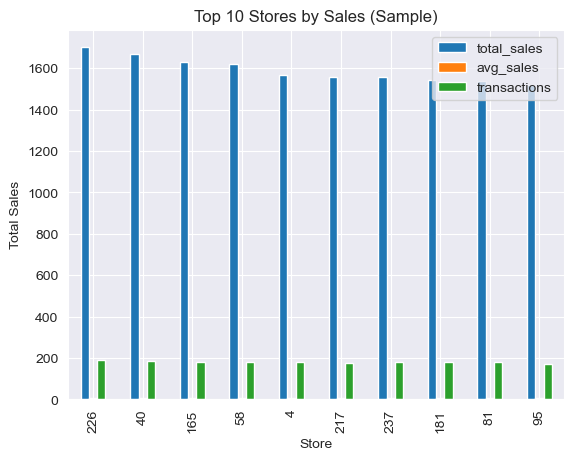

In [14]:
# =================================
# VISUALIZATION
# =================================

if "store_sales" in locals():
    store_sales.head(10).plot(kind="bar")
    plt.title("Top 10 Stores by Sales (Sample)")
    plt.xlabel("Store")
    plt.ylabel("Total Sales")
    plt.show()


In [15]:
# =================================
# SCALE TO FULL DATASET
# =================================

print("\nRunning final calculations on full dataset...")

if {"TOT_SALES", "PROD_QTY"}.issubset(df.columns):
    df["price_per_unit"] = df["TOT_SALES"] / df["PROD_QTY"]

if {"STORE_NBR", "TOT_SALES"}.issubset(df.columns):
    full_store_sales = (
        df.groupby("STORE_NBR")["TOT_SALES"]
        .sum()
        .sort_values(ascending=False)
    )

    print("\nTop stores (Full dataset):")
    print(full_store_sales.head())

# =================================
# FINAL CHECK
# =================================

print("\nAnalysis complete ✅")


Running final calculations on full dataset...

Top stores (Full dataset):
STORE_NBR
226    17605.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
Name: TOT_SALES, dtype: float64

Analysis complete ✅
